# A Quick Dashboard Using Django, Chart.js

This is a simple web based dataset dashboard with user register and login system based on Django. Built a user interface using bootstrap4 and chart.js. Only registed user could visit the data visualization pages. New user will be lead to register page to sign up. At the time users logged in, they would accees the plots of data set.

### Part1. Register page.
Django has a powerful authentication system in its default configuration. We will use User objects in django.contrib.auth.models for log in and register process. Also, creating a user profile contains user image is essential.

Code in models.py is:

In [ ]:
from django.db import models
from django.contrib.auth.models import User

# Create your models here.
class Profile(models.Model):
    user = models.OneToOneField(User, on_delete=models.CASCADE)
    image = models.ImageField(default = 'default.jpg', upload_to = 'profile_pics')

    def __str__(self):
        return f'{self.user.username} Profile'

Django also provides easy-to-use UserCreationForm from django.contrib.auth.forms, it is easy to complete register process, and to save new profile using .save() function.

Code in views.py is:

In [ ]:
from django.shortcuts import render, redirect
from django.contrib import messages
from django.contrib.auth.forms import UserCreationForm

from django.contrib.auth.decorators import login_required

# Create your views here.

def register(request):
    if request.method == 'POST':
        form = UserCreationForm(request.POST)
        if form.is_valid():
            form.save()
            username = form.cleaned_data.get('username')
            messages.success(request, f'Account created for {username}!')
            return redirect('login')
    else:
        form = UserCreationForm()
    return render(request, 'users/register.html',{'form': form})

@login_required
def profile(request):
    return render(request, 'users/profile.html')

When building html user interface, we select Bootstrap4 css templates for a better looking.
This is the reigster page looks like.

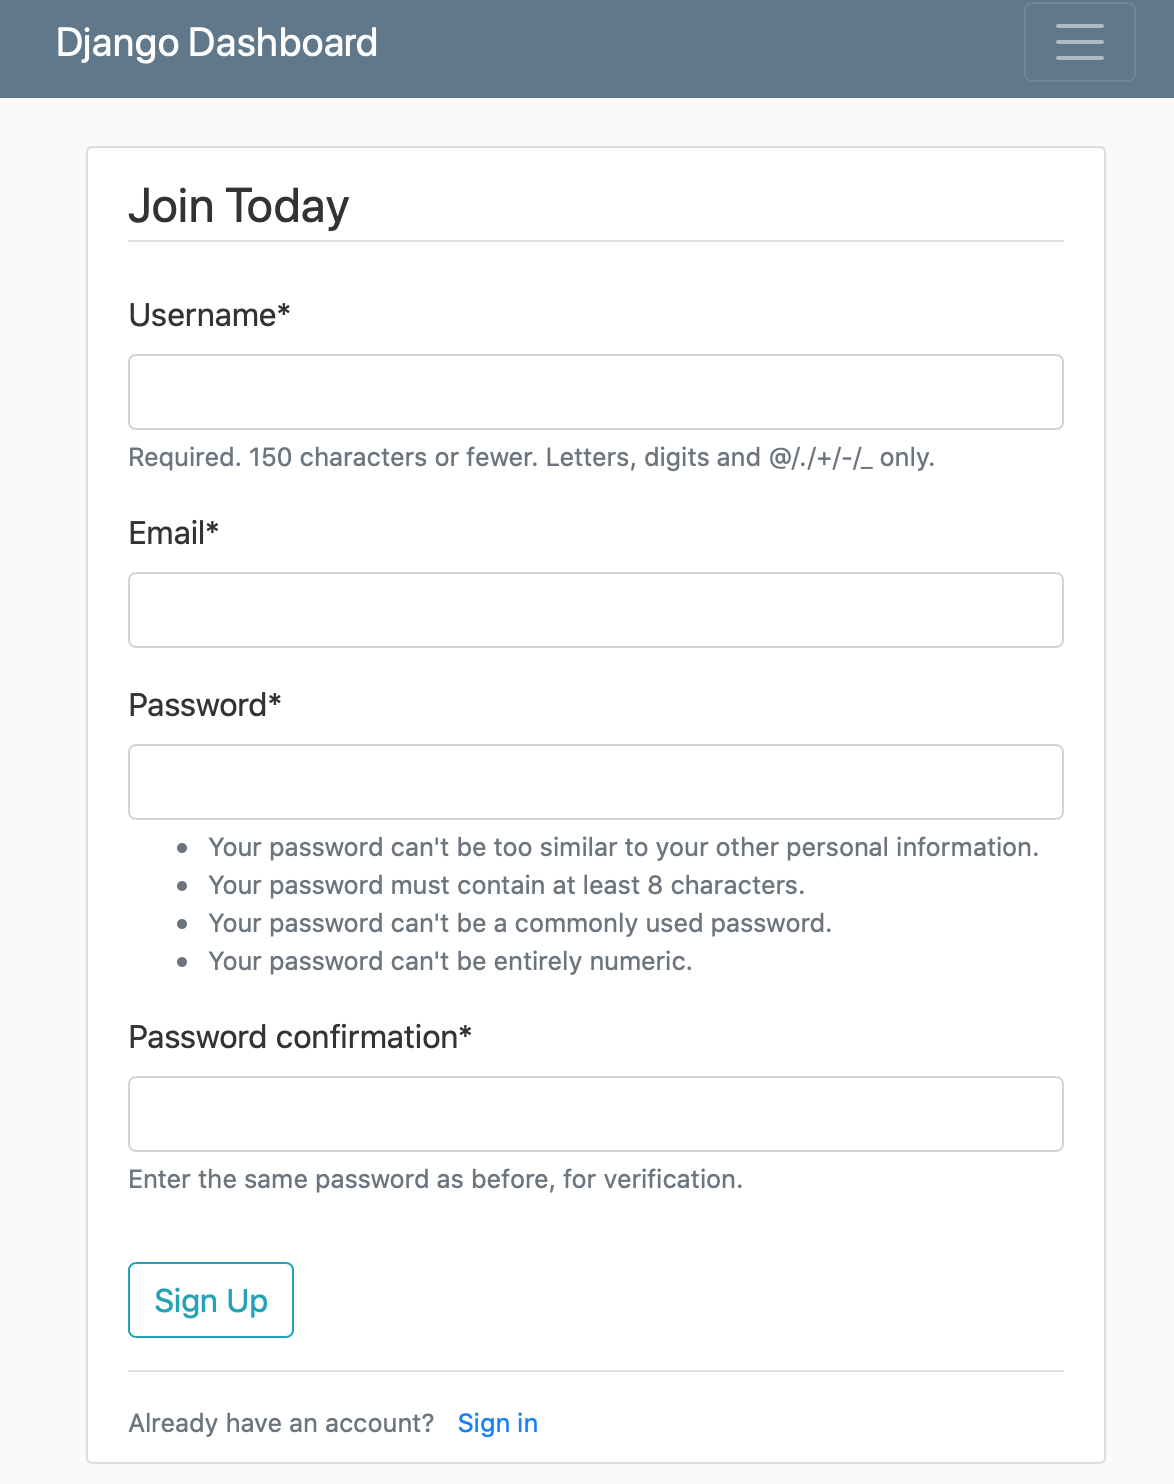

In [3]:
from IPython.display import Image
Image("p1.png")

In [ ]:
<!doctype html>
{% extends 'chart/base.html' %}
{% load crispy_forms_tags %}
{% block content %}
    <div class='content-section'>
        <form method="POST">
            {% csrf_token %}
            <fieldset class = 'form-group'>
                <legend class = 'border-bottom mb-4'>
                    Join Today
                </legend>
                {{form| crispy}}
            </fieldset>
            <div class = 'form-group'>
                <button class = 'btn btn-outline-info' type = 'submit'>
                    Sign Up
                </button>
            </div>
        </form>
        <div class= 'border-top pt-3'>
            <small class = 'text-muted'>
                Already have an account?
                <a class = 'ml-2' href="{%url 'register'%}">Sign in</a>
            </small>
        </div>
    </div>
{% endblock content%}

### Part2. Log in/ Log out page.
After registeration, visiter will be redirected to log in page:

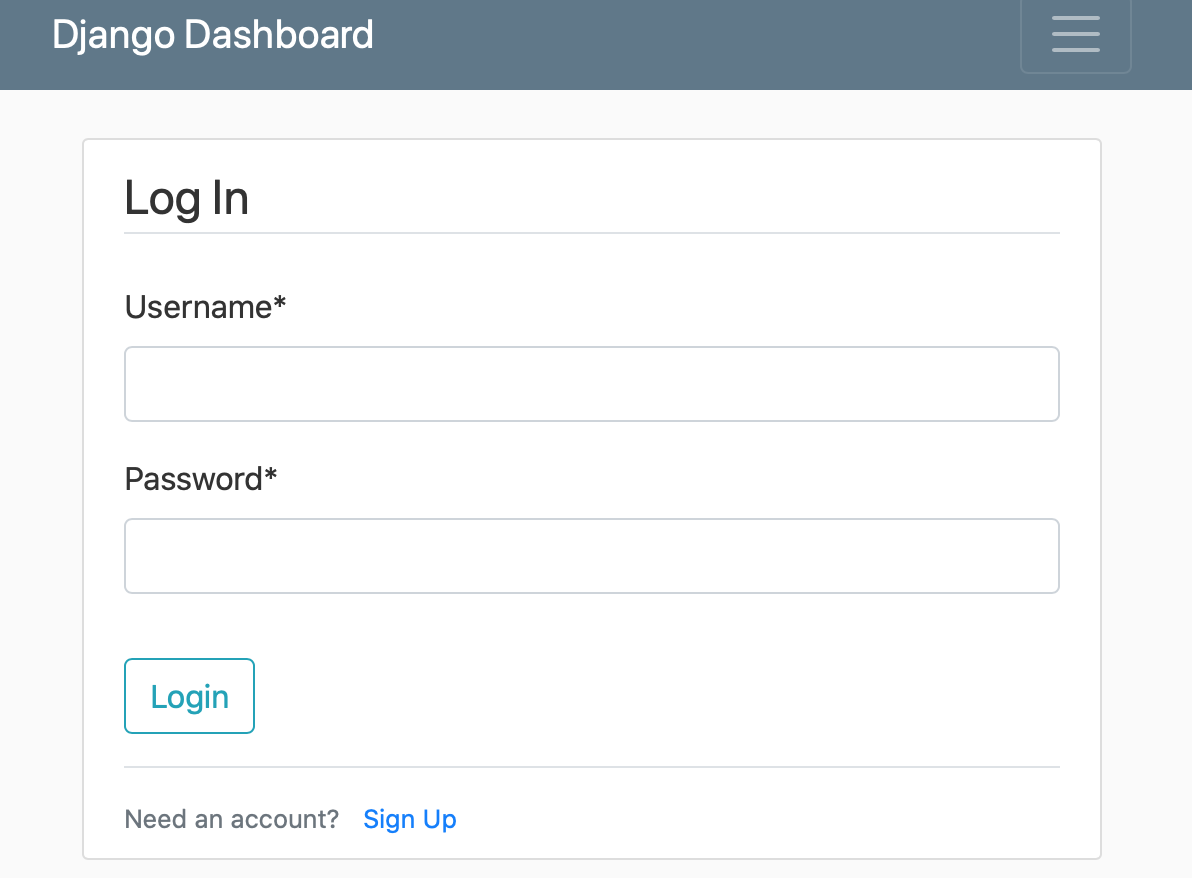

In [4]:
from IPython.display import Image
Image("p2.png")

The contents on the navigation bar should also change based on the logged in condition.
Partial code in base.html:

In [ ]:
 <!-- Navbar Right Side -->
    <div class="navbar-nav">
        {% if user.is_authenticated %}
        <a class="nav-item nav-link" href="{%url 'logout'%}">Logout</a>
        <a class="nav-item nav-link" href="{%url 'profile'%}">Profile</a>
        {% else %}
        <a class="nav-item nav-link" href="{%url 'login'%}">Login</a>
        <a class="nav-item nav-link" href="{%url 'register'%}">Register</a>
        {% endif %}
    </div>

When user clicks logout button, the page is:

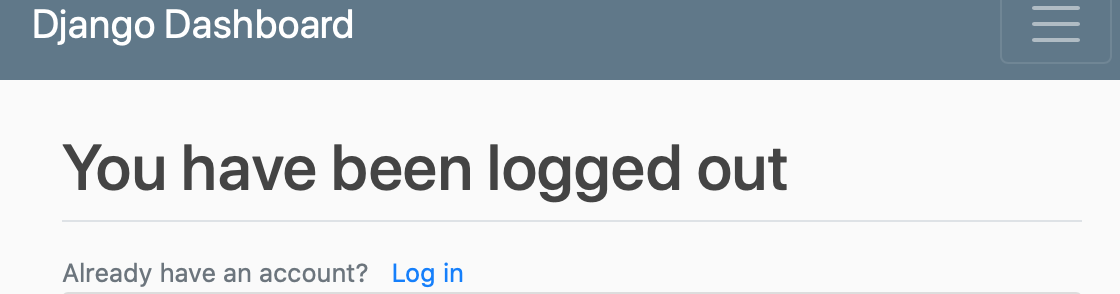

In [5]:
from IPython.display import Image
Image("p3.png")

### Part3. Dashboard (In Progress...)
Current Progress: <br>
- Deployed interactive charts using Chart.js


Features in development:
- Uploud Custom CSV Files
- Add more kinds of interactive charts

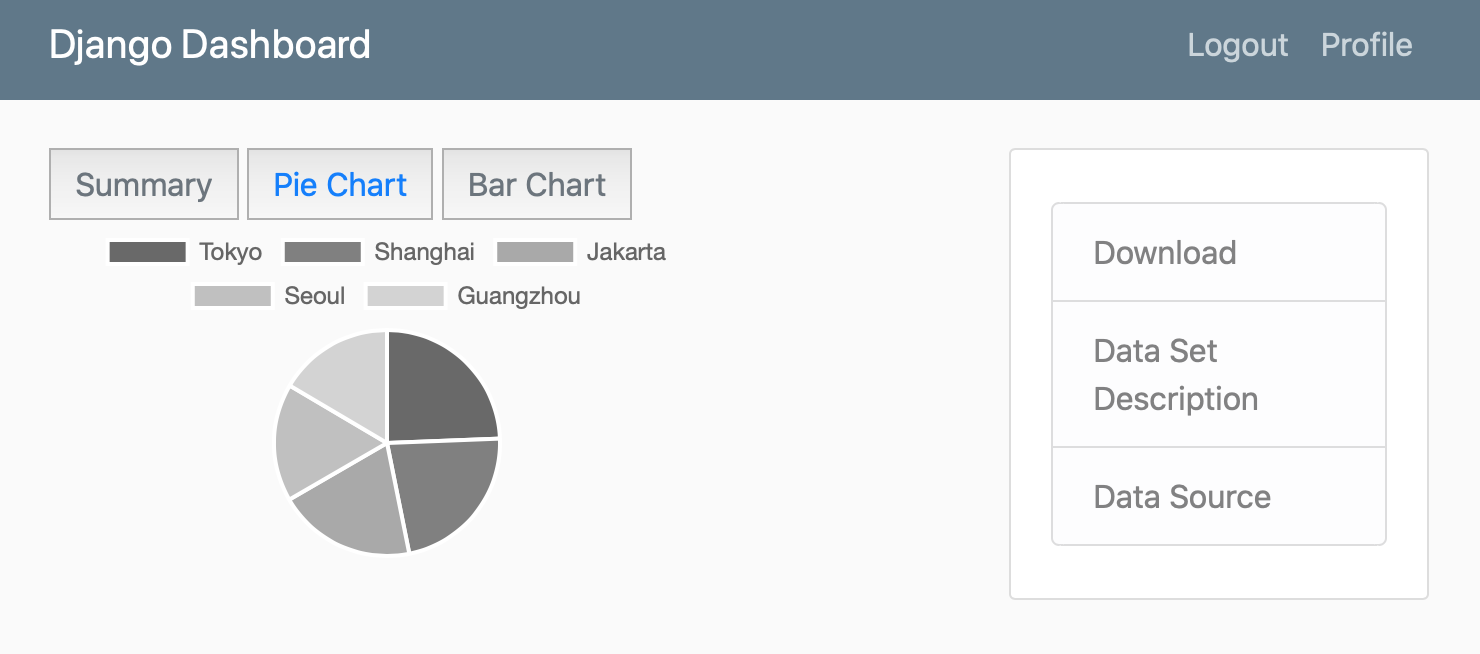

In [6]:
from IPython.display import Image
Image("p4.png")